# Introduction

Interest rate is the cost a lender charges for the use of assets expressed as a percentage of the principal. In simple term, when you borrow money, you pay interest. When you lend money, you earn interest.

The fed funds rate is the interest rate banks charge The fed funds rate directly affects short-term interest rates. These include the prime rate, credit card interest rates, and savings account rates. That's why the fed funds rate is a critical factor affecting the U.S. economic outlook

The Federal Open Market Committee (FOMC) changes the fed funds rate to control inflation and maintain healthy economic growth. The FOMC members watch economic indicators for signs of inflation or recession. 

# Problem Statement

The ability of market participants to predict the FF rate is important to modern analyses of monetary policy in that other interest rates are believed to be linked to the FF rate by the market expectation of monetary policy actions that directly affect the FF rate.

Develop a machine learning model to predict if the Fed will increase or decrease the interest rate.

# Data Cleaning and Feature Engineering

In [1]:
import numpy as np, pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from datetime import datetime

%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore',category=FutureWarning)

In [3]:
tlg = pd.read_csv('./data/top_line_growth/fredgraph/Quarterly.csv',parse_dates=['DATE'],index_col=['DATE'])
tr = pd.read_csv('./data/v_taylor_rule/fredgraph/Quarterly.csv',parse_dates=['DATE'],index_col=['DATE'])
interest_rate = pd.read_csv('./data/taylor_rule/fredgraph/Monthly.csv',parse_dates=['DATE'],index_col=['DATE'])

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
tr = tr.asfreq('MS')
tlg = tlg.asfreq('MS')

In [6]:
tr.ffill(inplace=True)
tlg.ffill(inplace=True)

In [7]:
tr.tail()

,GDPPOT_GDPC1_GDPDEF_PC1
DATE,
2029-06-01,.
2029-07-01,.
2029-08-01,.
2029-09-01,.
2029-10-01,.


In [8]:
tlg.tail()

,A455RC1Q027SBEA
DATE,
2019-03-01,3.66250
2019-04-01,3.76391
2019-05-01,3.76391
2019-06-01,3.76391
2019-07-01,3.57046


In [9]:
tr.loc[tr['GDPPOT_GDPC1_GDPDEF_PC1'] != '.'].tail()

,GDPPOT_GDPC1_GDPDEF_PC1
DATE,
2019-05-01,4.00823725133179613600
2019-06-01,4.00823725133179613600
2019-07-01,3.97400942302115026700
2019-08-01,3.97400942302115026700
2019-09-01,3.97400942302115026700


In [10]:
tr['GDPPOT_GDPC1_GDPDEF_PC1'] = tr['GDPPOT_GDPC1_GDPDEF_PC1'].replace('.','3.97400942302115026700')

In [11]:
tr.dtypes

GDPPOT_GDPC1_GDPDEF_PC1    object
dtype: object

In [12]:
tr['GDPPOT_GDPC1_GDPDEF_PC1'] = tr['GDPPOT_GDPC1_GDPDEF_PC1'].astype(float)

In [13]:
tr.dtypes

GDPPOT_GDPC1_GDPDEF_PC1    float64
dtype: object

In [14]:
tlg['A455RC1Q027SBEA_12'] = tlg['A455RC1Q027SBEA'].rolling(window=12).mean()
tr['GDPPOT_GDPC1_GDPDEF_PC1_12'] = tr['GDPPOT_GDPC1_GDPDEF_PC1'].rolling(window=12).mean()

## Convert to Classification Problem

In [15]:
difference = interest_rate.diff()
decision = []
for i in difference['FEDFUNDS']:
    if i > 0:
        decision.append("increase")
    elif i < 0:
        decision.append("decrease")
    else:
        decision.append("maintain")
interest_rate['change_ir'] = interest_rate['FEDFUNDS'].diff()
interest_rate['decision'] = decision
interest_rate.drop(labels=['change_ir'], axis=1, inplace=True)
interest_rate.head()

,FEDFUNDS,decision
DATE,,
1954-07-01,0.80,maintain
1954-08-01,1.22,increase
1954-09-01,1.06,decrease
1954-10-01,0.85,decrease
1954-11-01,0.83,decrease


## Merge DataFrames

In [16]:
dfs = [tlg,tr,interest_rate]
df = reduce(lambda left,right: pd.merge(left,right,on='DATE',how='right'), dfs)
print(df.shape)
df.head()

(784, 6)


,A455RC1Q027SBEA,A455RC1Q027SBEA_12,GDPPOT_GDPC1_GDPDEF_PC1,GDPPOT_GDPC1_GDPDEF_PC1_12,FEDFUNDS,decision
DATE,,,,,,
1954-07-01,-2.85622,-1.027169,1.240151,1.973316,0.80,maintain
1954-08-01,-2.85622,-2.058856,1.240151,1.801557,1.22,increase
1954-09-01,-2.85622,-3.090542,1.240151,1.629798,1.06,decrease
1954-10-01,5.29912,-2.518410,2.040448,1.633474,0.85,decrease
1954-11-01,5.29912,-1.946277,2.040448,1.637150,0.83,decrease


## Graphing

In [16]:
df.columns

Index(['A455RC1Q027SBEA', 'GDPPOT_GDPC1_GDPDEF_PC1', 'FEDFUNDS', 'decision',
       'A455RC1Q027SBEA_12', 'GDPPOT_GDPC1_GDPDEF_PC1_12'],
      dtype='object')

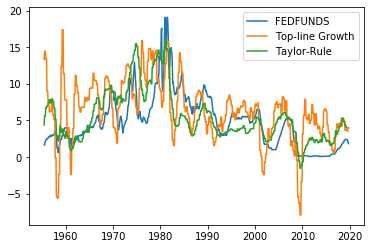

In [17]:
plt.plot(df['FEDFUNDS'], label='FEDFUNDS');
plt.plot(df['A455RC1Q027SBEA'], label='Top-line Growth');
plt.plot(df['GDPPOT_GDPC1_GDPDEF_PC1'], label='Taylor-Rule');
plt.legend();

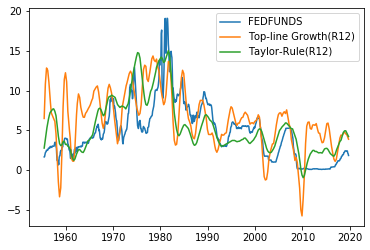

In [18]:
plt.plot(df['FEDFUNDS'], label='FEDFUNDS');
plt.plot(df['A455RC1Q027SBEA_12'], label='Top-line Growth(R12)');
plt.plot(df['GDPPOT_GDPC1_GDPDEF_PC1_12'], label='Taylor-Rule(R12)');
plt.legend();

In [19]:
df.columns

Index(['A455RC1Q027SBEA', 'GDPPOT_GDPC1_GDPDEF_PC1', 'FEDFUNDS', 'decision',
       'A455RC1Q027SBEA_12', 'GDPPOT_GDPC1_GDPDEF_PC1_12'],
      dtype='object')

In [20]:
# df.drop(labels=['A455RC1Q027SBEA_12'],axis=1,inplace=True)

In [21]:
# df.drop(labels=['GDPPOT_GDPC1_GDPDEF_PC1_12'],axis=1,inplace=True)

## Drop "Maintain" class

In [22]:
df.shape

(773, 6)

In [23]:
df = df[~df['decision'].isin(['maintain'])]

In [24]:
print(df.shape)
df['decision'].unique()

(714, 6)


array(['increase', 'decrease'], dtype=object)

In [25]:
# convert target variable to numeric
df.replace({'decision':{'increase':1,'decrease':2}},inplace=True)

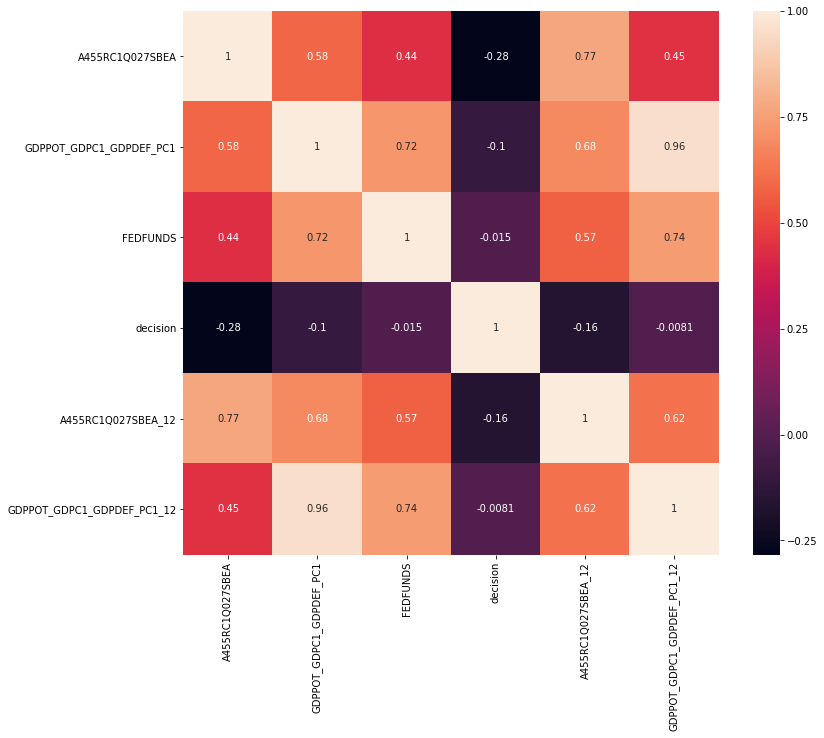

In [26]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
ax = sns.heatmap(cor, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Split data into Train and Test Set

In [27]:
# split into 75% training data and 25% test data
df = df.drop('FEDFUNDS',axis=1)
train_size = int(len(df) * .75)
train, test = df[0:train_size], df[train_size:len(df)]

# Model

## Baseline Accuracy

In [28]:
# Create X and y variable
X = train.drop('decision',axis=1)
y = train['decision']

1    0.558879
2    0.441121
Name: decision, dtype: float64


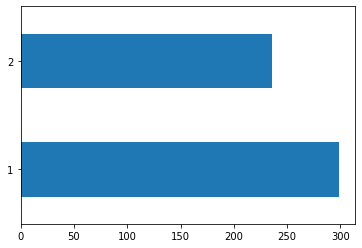

In [29]:
# look at the distribution of the target
print(train['decision'].value_counts(normalize=True))
train['decision'].value_counts().plot(kind="barh");

Baseline model accuracy is 0.5589.

## Model Selection

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import mglearn

/Users/kenricklow/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/kenricklow/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(401, 4) (401,)
(134, 4) (134,)


In [32]:
# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=42))])

In [33]:
# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                   'clf__C': param_range_fl,
                   'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'],
                    'clf__gamma': ['auto','scale'],
                    'clf__C': param_range}]

In [34]:
# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
                     param_grid=grid_params_lr,
                     scoring='accuracy',
                     cv=10) 

gs_rf = GridSearchCV(estimator=pipe_rf,
                     param_grid=grid_params_rf,
                     scoring='accuracy',
                     cv=10, 
                     n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
                      param_grid=grid_params_svm,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=jobs)

In [35]:
# List of pipelines for ease of iteration
grids = [gs_lr, gs_rf, gs_svm]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression',
             1: 'Random Forest',
             2: 'Support Vector Machine'}

In [36]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs.fit(X_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if accuracy_score(y_test, y_pred) > best_acc:
        best_acc = accuracy_score(y_test, y_pred)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Logistic Regression
Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.673
Test set accuracy score for best params: 0.634 

Estimator: Random Forest


/Users/kenricklow/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/kenricklow/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 9, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 7}
Best training accuracy: 0.683
Test set accuracy score for best params: 0.627 

Estimator: Support Vector Machine
Best params: {'clf__C': 4, 'clf__gamma': 'auto', 'clf__kernel': 'linear'}
Best training accuracy: 0.681
Test set accuracy score for best params: 0.619 

Classifier with best test set accuracy: Logistic Regression


/Users/kenricklow/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Testing our Model

In [37]:
actual = test['decision']
test = test.drop(labels='decision', axis=1)

In [38]:
lr = LogisticRegression(C=1.0,
                        penalty='l1',
                        solver='liblinear',
                        random_state=42)

ss = StandardScaler()
pipe = Pipeline(steps=[('scaler', ss),
                      ('classifier', lr)])

pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l1', random_state=42,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [39]:
test = ss.fit_transform(test)

Accuracy: 0.693


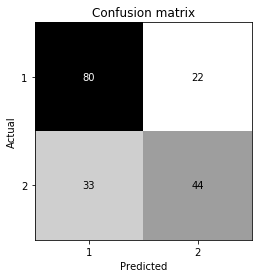

In [40]:
prediction = pipe.predict(test)
print("Accuracy: {:.3f}".format(accuracy_score(actual, prediction)))

scores_image = mglearn.tools.heatmap(confusion_matrix(actual, prediction),
                                     xlabel='Predicted',
                                    ylabel='Actual',
                                    xticklabels=[1,2],
                                    yticklabels=[1,2],
                                    cmap=plt.cm.gray_r,
                                    fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [41]:
pred_df = pd.DataFrame({'true_values': actual,
                        'prediction' : prediction})
print(pred_df.loc[pred_df['true_values'] != pred_df['prediction']].shape)
pred_df.sort_index().loc[pred_df['true_values'] != pred_df['prediction']]

(55, 2)


,true_values,prediction
DATE,,
2002-02-01,1,2
2002-04-01,1,2
2002-08-01,1,2
2002-09-01,1,2
2002-11-01,2,1
2002-12-01,2,1
2003-03-01,2,1
2003-06-01,2,1
2003-07-01,2,1


# Conclusion

Although the model is unable to predict the decision of the Fed accurately, it is able to perform better on the most recent dataset, which is also the test data set.